# Individual Portfolio Management

## 1. Retrieve Data and Cleaning
Before getting started, we import the libraries we will be using for the data analysis:

- `pandas` is used for tabular data.  
- `numpy` will be useful later for numerical operations.  
- `matplotlib.pyplot` and `seaborn` are often used for visualisations (we’ll use them later).  
- `yfinance` is used to retrieve stock market data directly from Yahoo Finance.

Next, we retrieve the data from Yahoo Finance using `yf.download()`.  
This allows us to directly pull historical data for multiple tickers into a `DataFrame`.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import yfinance as yf

plt.style.use("ggplot")

### Portfolio Formation

We selected 10 representative U.S. tech and growth stocks to construct a diversified portfolio. The selected stocks span key sectors such as semiconductors, software, social media, energy, and materials. The data covers the period from `2020-01-01` to `2024-12-31`.

- We retrieved the daily stock price data using the `yfinance` package.
- Each stock's data is retrieved separately and annotated with its ticker symbol for identification.
- We reset the index to ensure `Date` is a standard column, making future transformations easier.
- We concatenate all individual DataFrames into a single DataFrame named `multidata`.
- Finally, the combined dataset is exported as a CSV file for future use.

In [44]:
tickers = ["NVDA", "AMD", "TSM", "AVGO", "MSFT", "META", "PLTR", "CVX", "COP", "NEM"]
groups= []

for ticker in tickers:
    data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
    data.columns = data.columns.droplevel(1)  # Remove multi-level column index
    data.insert(0, "Ticker", ticker)  # Add ticker column
    data.reset_index(inplace=True)
    groups.append(data)

multidata = pd.concat(groups)
multidata
# Save to current working directory as 'multidata.csv'
multidata.to_csv("multidata.csv", index=False)

/tmp/ipykernel_10641/779409262.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_10641/779409262.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_10641/779409262.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_10641/779409262.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 comple

In [45]:
multidata

Price,Date,Ticker,Close,High,Low,Open,Volume
0,2020-01-02,NVDA,5.971747,5.971747,5.892343,5.942873,237536000
1,2020-01-03,NVDA,5.876162,5.919971,5.827125,5.852017,205384000
2,2020-01-06,NVDA,5.900804,5.906031,5.756682,5.782818,262636000
3,2020-01-07,NVDA,5.972245,6.018045,5.884128,5.929182,314856000
4,2020-01-08,NVDA,5.983447,6.024767,5.927938,5.968014,277108000
...,...,...,...,...,...,...,...
1252,2024-12-23,NEM,37.758018,37.856964,37.065392,37.609597,8591600
1253,2024-12-24,NEM,37.906441,37.916334,37.471073,37.797599,3549300
1254,2024-12-26,NEM,37.688755,38.203278,37.688755,37.906439,5896400
1255,2024-12-27,NEM,37.441387,37.817385,37.114862,37.213810,5456100


### Data Cleaning Verification
The data table shown above seems to be very clean, even the date is the right format. But it's better to conduct related data cleaning process.

Before we begin cleaning, it is important to understand what the dataset looks like. We use `multidata.info()` to inspect the data types, number of values per column, and overall shape of the dataset.

In [46]:
print("Dataset Structure:")
multidata.info()

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
Index: 12382 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    12382 non-null  datetime64[ns]
 1   Ticker  12382 non-null  object        
 2   Close   12382 non-null  float64       
 3   High    12382 non-null  float64       
 4   Low     12382 non-null  float64       
 5   Open    12382 non-null  float64       
 6   Volume  12382 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 773.9+ KB


### Data Quality Check

- We checked for missing values in each column using `isnull().sum()`.
- The output confirmed that **no missing data** exists in any column.

In [47]:
print("Missing Values per Column:")
print(multidata.isnull().sum())

Missing Values per Column:
Price
Date      0
Ticker    0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


### Date Formatting and Indexing
- We converted the Date column to datetime format using pd.to_datetime().
- Then we set it as the index with set_index(), which is useful for time series operations.

In [48]:
multidata['Date'] = pd.to_datetime(multidata['Date'], dayfirst=True)
multidata.set_index('Date', inplace=True)
multidata

Price,Ticker,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,NVDA,5.971747,5.971747,5.892343,5.942873,237536000
2020-01-03,NVDA,5.876162,5.919971,5.827125,5.852017,205384000
2020-01-06,NVDA,5.900804,5.906031,5.756682,5.782818,262636000
2020-01-07,NVDA,5.972245,6.018045,5.884128,5.929182,314856000
2020-01-08,NVDA,5.983447,6.024767,5.927938,5.968014,277108000
...,...,...,...,...,...,...
2024-12-23,NEM,37.758018,37.856964,37.065392,37.609597,8591600
2024-12-24,NEM,37.906441,37.916334,37.471073,37.797599,3549300
2024-12-26,NEM,37.688755,38.203278,37.688755,37.906439,5896400


### Duplicate Data Inspection

- Checked for any **duplicate rows** in the dataset using `duplicated()`.
- No duplicate rows were found.

- Checked for **duplicate dates in the index**, which can occur when multiple tickers share the same trading day.
- Found 0 duplicate dates

- Finally, confirmed that **no remaining duplicate rows** exist.
- Verified again that there are **no missing values** after this check.

In [49]:
duplicate_rows = multidata[multidata.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
duplicate_rows = multidata[multidata.duplicated(keep=False)]
print(duplicate_rows)

duplicate_dates = multidata[multidata.index.duplicated()]
print(f"Number of duplicate dates: {duplicate_dates.shape[0]}")
duplicate_dates = multidata[multidata.duplicated(keep=False)]
print(duplicate_dates)
print(f"Remaining duplicate rows: {multidata.duplicated().sum()}")
multidata.isnull().sum()

Number of duplicate rows: 0
Empty DataFrame
Columns: [Ticker, Close, High, Low, Open, Volume]
Index: []
Number of duplicate dates: 11125
Empty DataFrame
Columns: [Ticker, Close, High, Low, Open, Volume]
Index: []
Remaining duplicate rows: 0


Price
Ticker    0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

## 2. Data Exploration
In this step, we transformed our dataset into a **wide format**, where:

- Each **row** represents a trading day (`Date` as index),
- Each **column** corresponds to a stock's ticker symbol, and
- Each **cell** contains the **closing price** for that stock on the given day.

This reshaping was achieved using the `pivot()` function on the `multidata` DataFrame.


In [50]:
# Pivot the data to wide format (date as index, tickers as columns, closing prices)
wide_close = multidata.pivot(columns="Ticker", values="Close")

# Show the head and tail of the wide DataFrame
print("Head of closing prices:")
print(wide_close.head())

print("Tail of closing prices:")
print(wide_close.tail())

Head of closing prices:
Ticker            AMD       AVGO        COP        CVX        META  \
Date                                                                 
2020-01-02  49.099998  27.836229  53.489151  95.001549  208.635406   
2020-01-03  48.599998  27.128223  53.685268  94.672974  207.531494   
2020-01-06  48.389999  27.087639  54.322632  94.352188  211.440033   
2020-01-07  48.250000  26.994387  54.322632  93.147346  211.897507   
2020-01-08  47.830002  26.657654  53.064243  92.083359  214.045731   

Ticker            MSFT        NEM      NVDA  PLTR        TSM  
Date                                                          
2020-01-02  153.042282  36.490917  5.971747   NaN  54.292782  
2020-01-03  151.136673  36.161633  5.876162   NaN  52.502323  
2020-01-06  151.527298  36.524689  5.900804   NaN  51.896450  
2020-01-07  150.145752  36.499355  5.972245   NaN  52.737423  
2020-01-08  152.537338  35.528400  5.983447   NaN  53.126263  
Tail of closing prices:
Ticker             A

### Visualization of Historical Closing Prices

To gain an initial understanding of stock price movements, we visualized the **daily closing prices** of all 10 selected U.S. tech and growth stocks over the period **2020–2024**.

The plot below helps us identify:
- Long-term price trends for each company,
- Relative performance over time,
- And possible structural changes or growth momentum.

The figure was created using `matplotlib` and customized with labels, legends, and grid enhancements for better clarity.

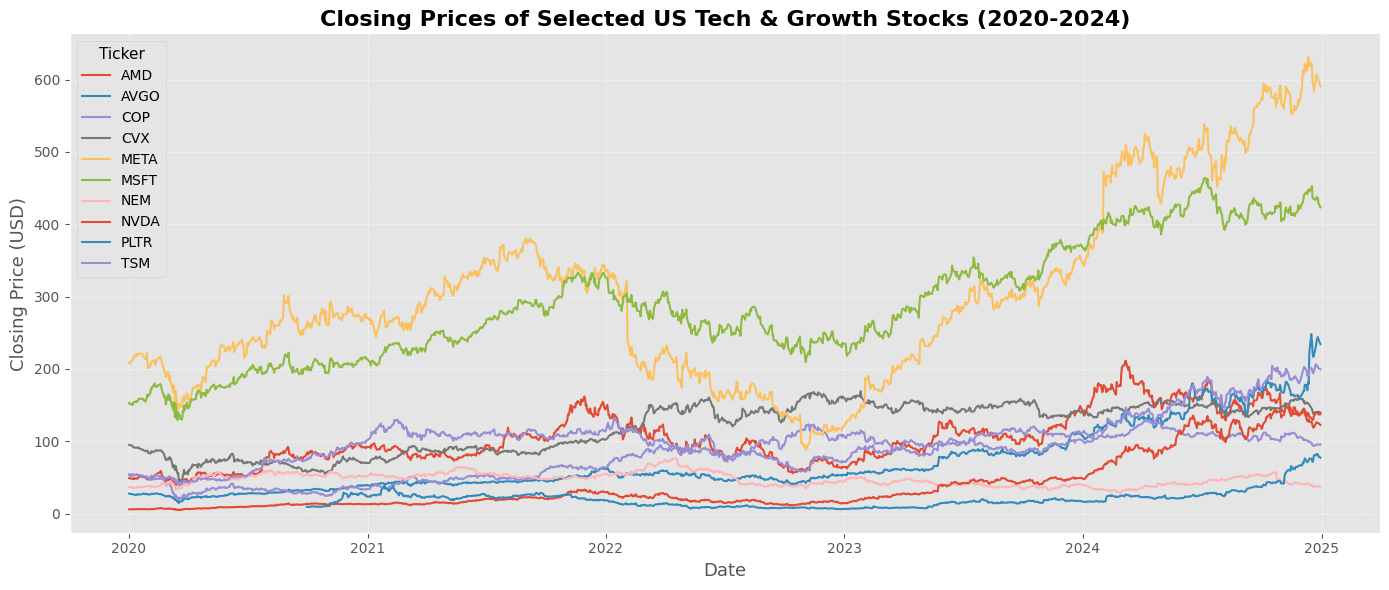

In [51]:
plt.figure(figsize=(14, 6))
for ticker in wide_close.columns:
    plt.plot(wide_close.index, wide_close[ticker], label=ticker)

plt.title("Closing Prices of Selected US Tech & Growth Stocks (2020-2024)", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=13)
plt.ylabel("Closing Price (USD)", fontsize=13)
plt.legend(title="Ticker", loc="upper left", fontsize=10, title_fontsize=11, frameon=True)
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
sns.despine()
plt.show()

## 3. Backtesting

### Bollinger Bands Strategy Analysis (2020-2024)

This section demonstrates how we apply a **Bollinger Bands-based trading strategy** to a portfolio of 10 U.S. tech and growth stocks. The approach involves signal generation, trade simulation, return calculation, and performance comparison. Each step is explained in detail for clarity and reproducibility.

The graph below illustrates the Bollinger Bands trading signals for each selected stock. It includes:
- Close price line
- SMA20: 20-day simple moving average
- Upper and Lower Bollinger Bands (±2 standard deviations)
- Buy signals (green ▲) when price dips below the lower band
- Sell signals (red ▼) when price rises above the upper band

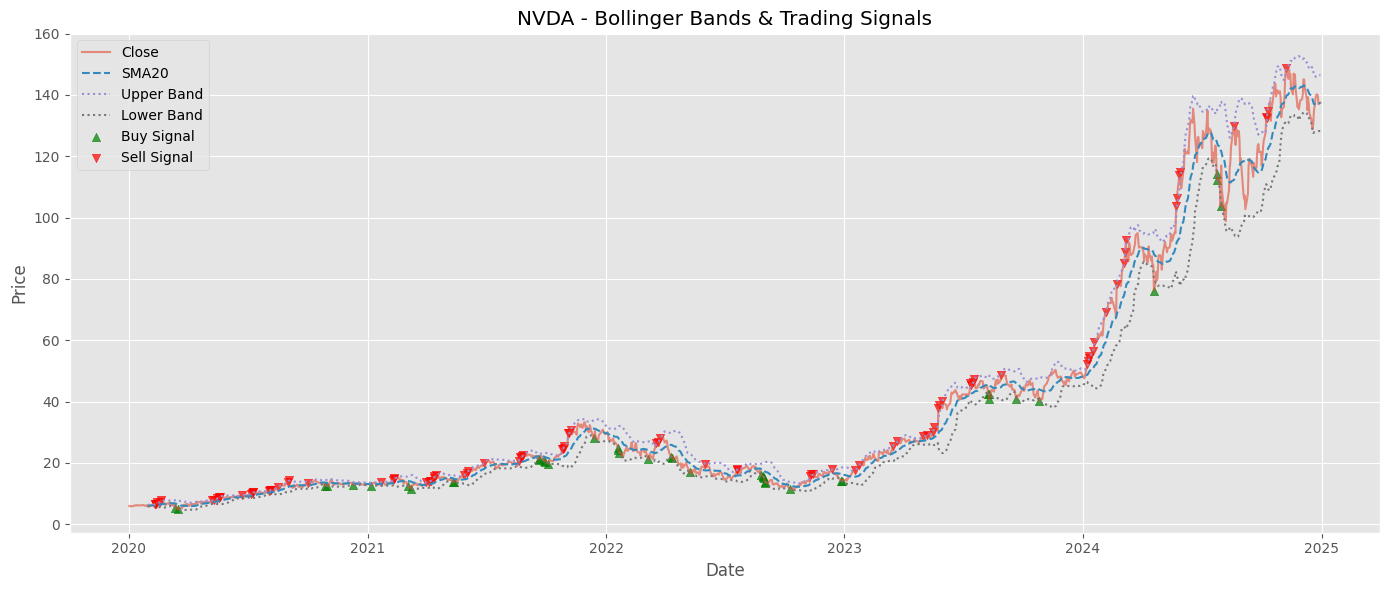

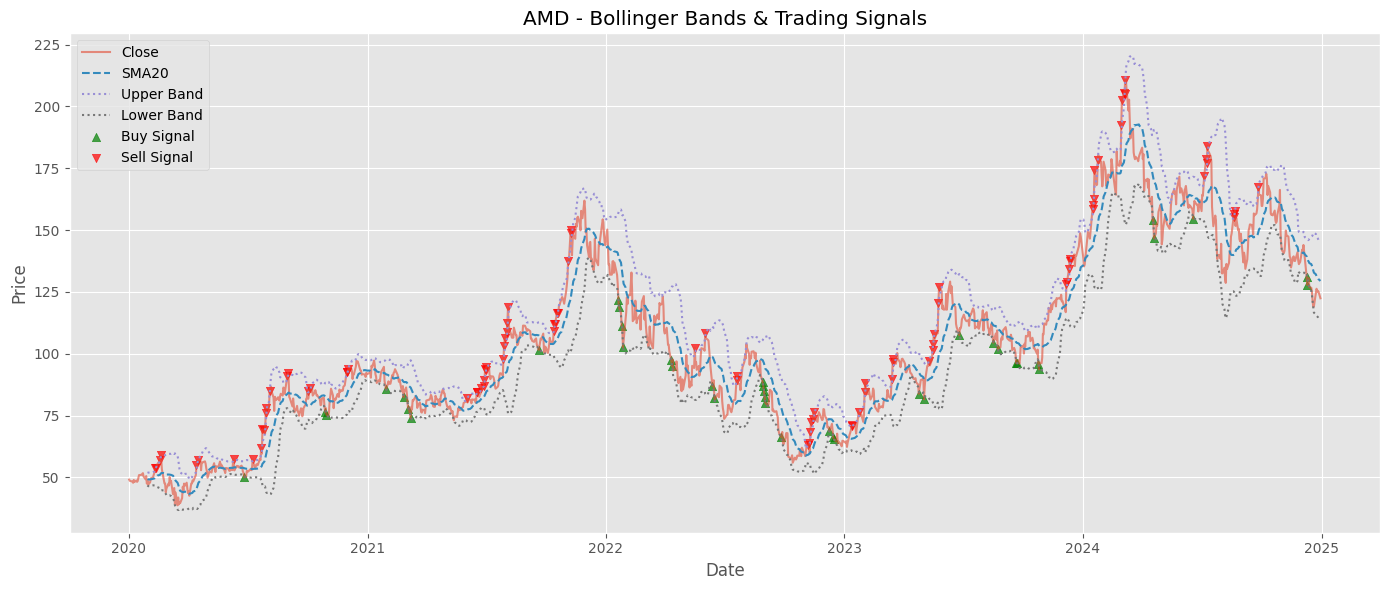

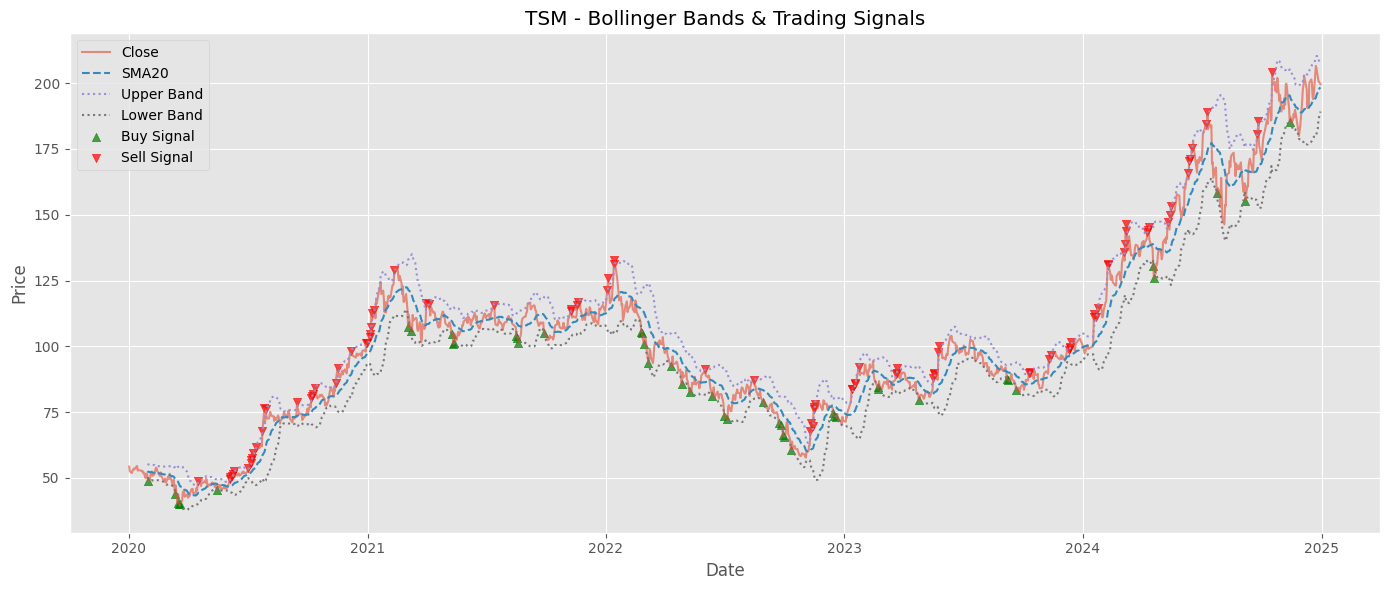

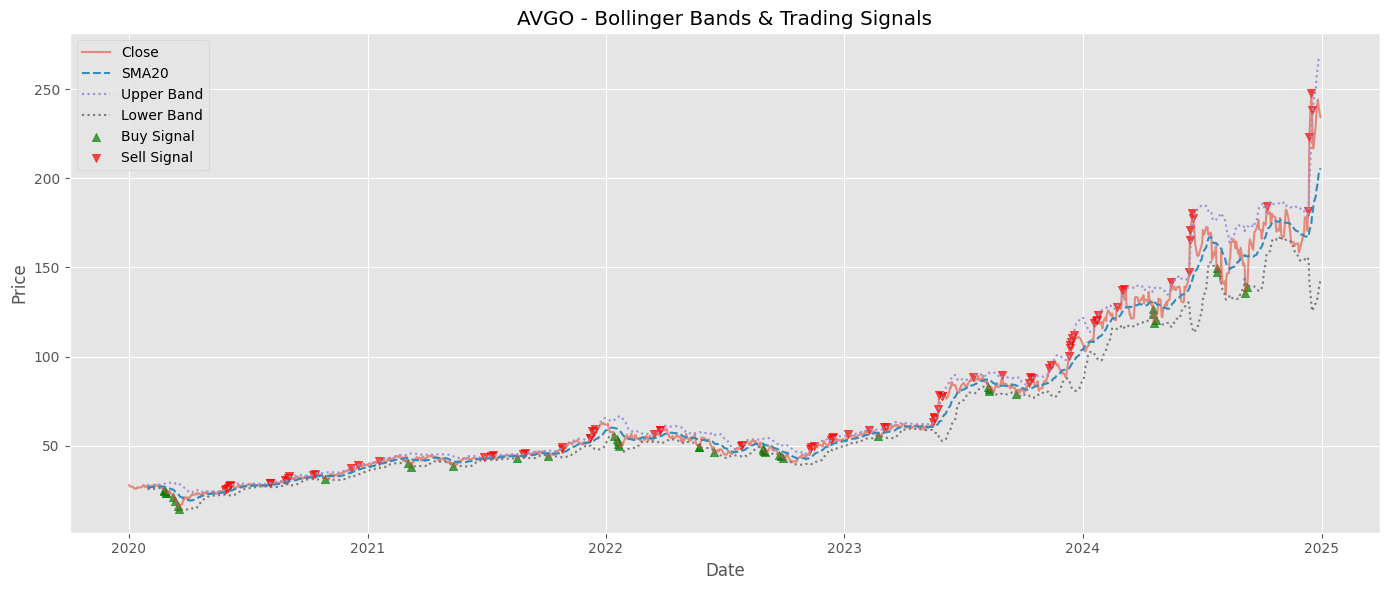

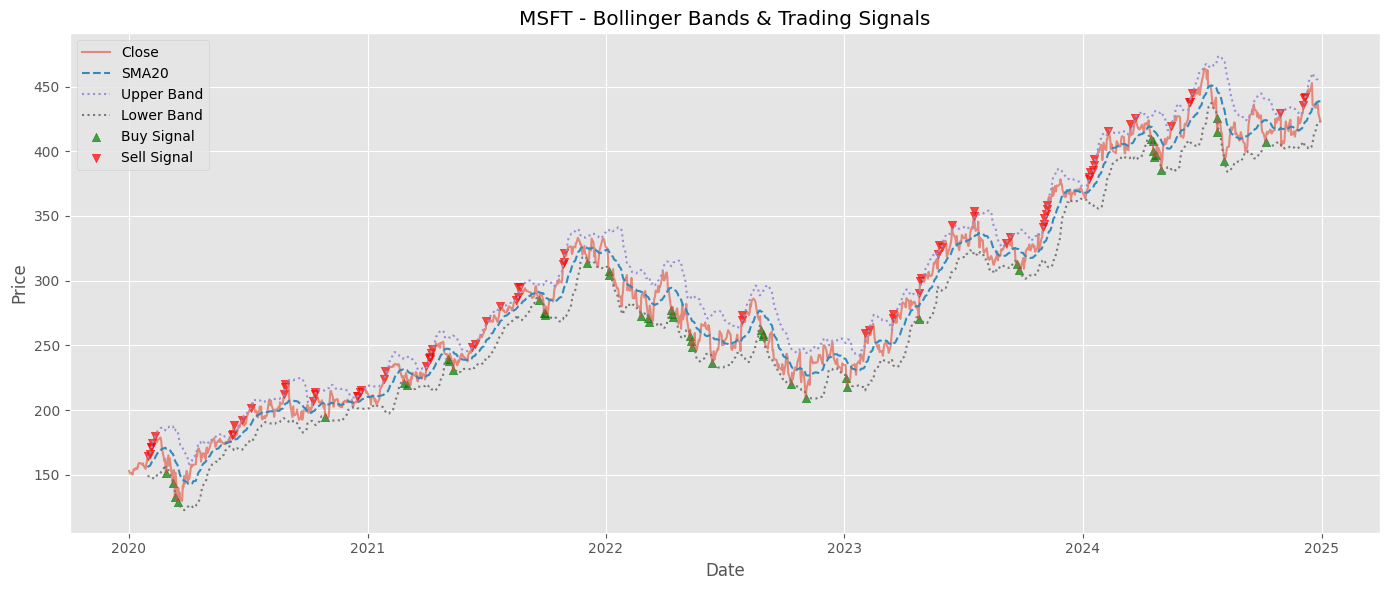

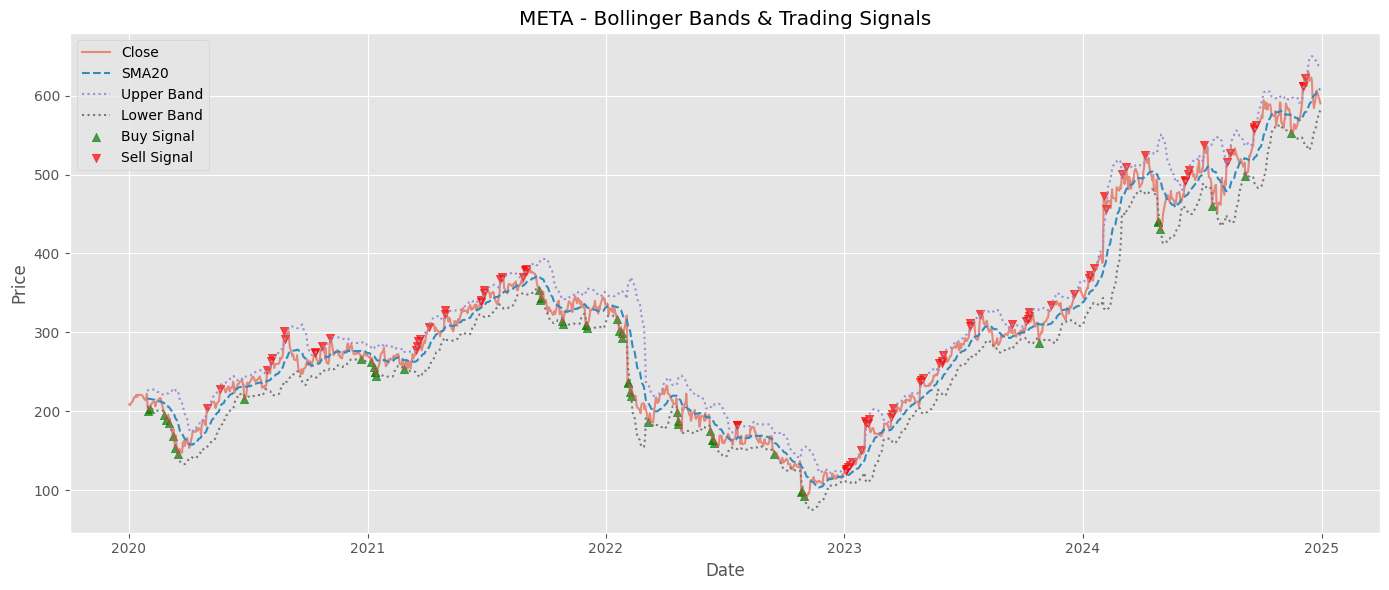

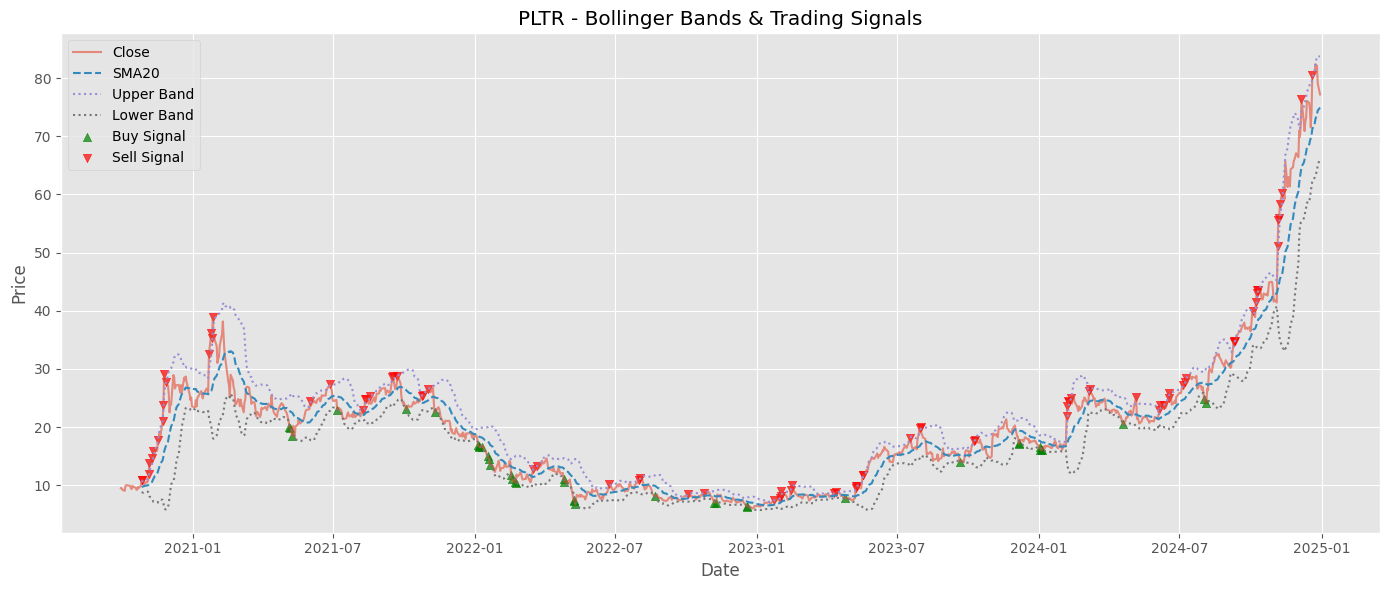

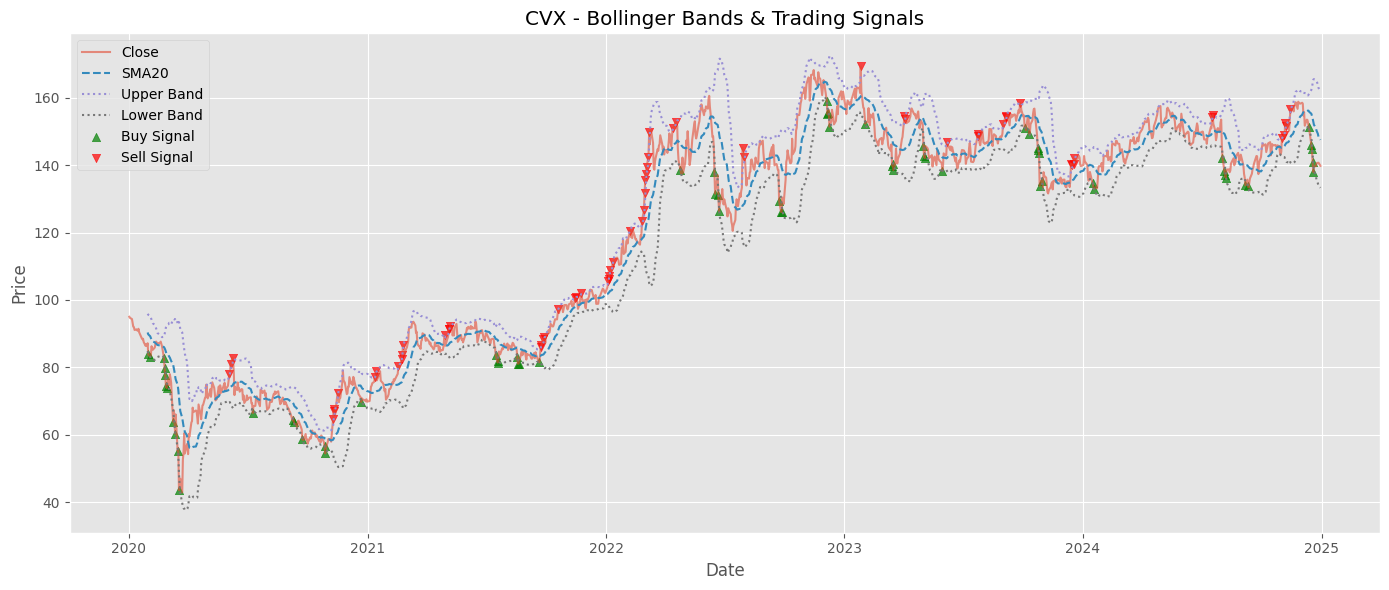

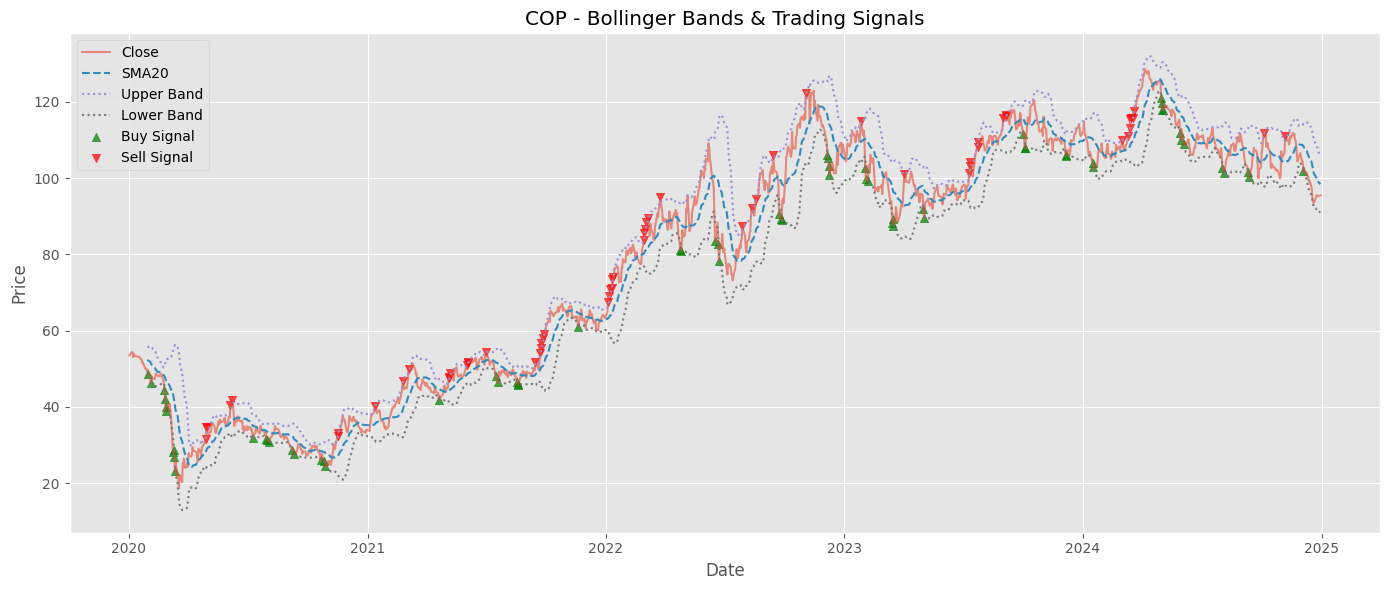

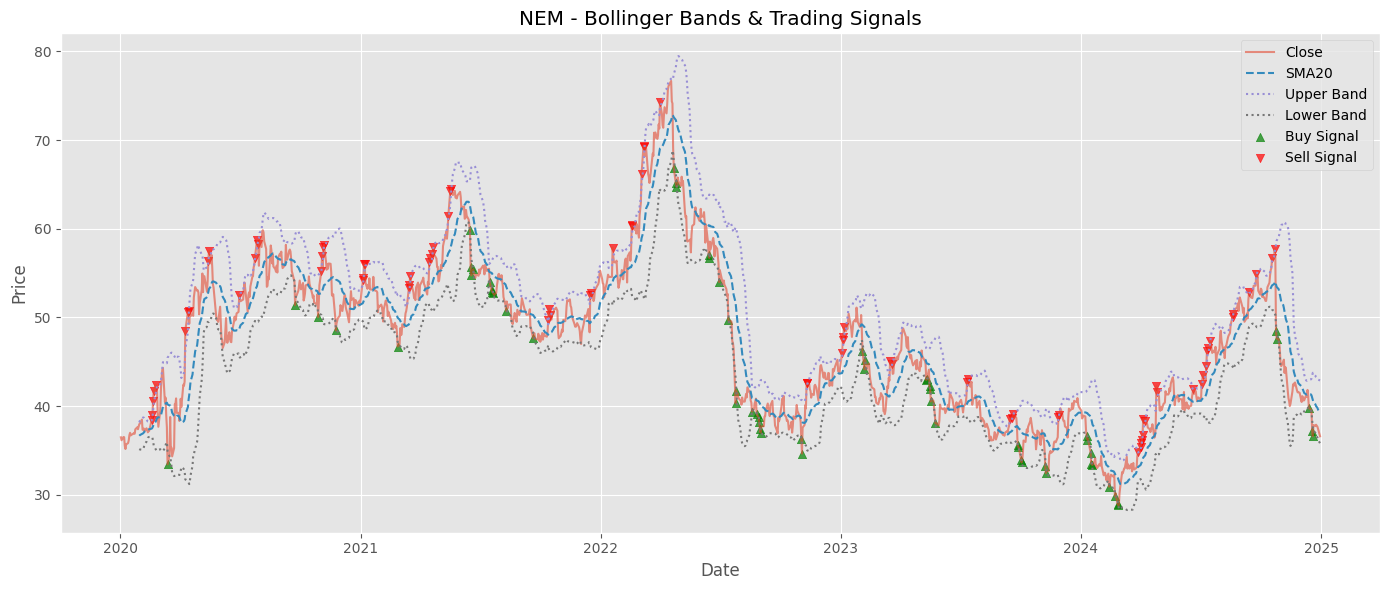

In [52]:
# Load CSV
multidata = pd.read_csv("multidata.csv")
multidata['Date'] = pd.to_datetime(multidata['Date'])

# Define stock tickers
tickers = ["NVDA", "AMD", "TSM", "AVGO", "MSFT", "META", "PLTR", "CVX", "COP", "NEM"]

# Store Bollinger strategy results
bollinger_results = []

# Loop through each stock
for ticker in tickers:
    df = multidata[multidata['Ticker'] == ticker].copy()
    df.set_index("Date", inplace=True)

    # Calculate Bollinger Bands
    df['SMA20'] = df['Close'].rolling(window=20).mean()
    df['STD'] = df['Close'].rolling(window=20).std()
    df['Upper'] = df['SMA20'] + 2 * df['STD']
    df['Lower'] = df['SMA20'] - 2 * df['STD']

    # Generate entry signals
    df['Signal'] = 0
    df.loc[df['Close'] < df['Lower'], 'Signal'] = 1    # Buy signal
    df.loc[df['Close'] > df['Upper'], 'Signal'] = -1   # Sell signal

    # Generate positions (exit when mean is crossed)
    df['Position'] = 0
    current_position = 0
    for i in range(1, len(df)):
        if df['Signal'].iloc[i] != 0:
            current_position = df['Signal'].iloc[i]
        elif (current_position == 1 and df['Close'].iloc[i] >= df['SMA20'].iloc[i]) or \
             (current_position == -1 and df['Close'].iloc[i] <= df['SMA20'].iloc[i]):
            current_position = 0
        df.iloc[i, df.columns.get_loc('Position')] = current_position
    df['Position'] = df['Position'].shift(1).fillna(0)

    # Daily returns
    df['Market Return'] = df['Close'].pct_change()
    df['Strategy Return'] = df['Position'] * df['Market Return']

    # Store result
    bollinger_results.append(df[['Close', 'SMA20', 'Upper', 'Lower', 'Signal', 'Position', 'Market Return', 'Strategy Return']])

    # Plot
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df['Close'], label='Close', alpha=0.6)
    plt.plot(df.index, df['SMA20'], label='SMA20', linestyle='--')
    plt.plot(df.index, df['Upper'], label='Upper Band', linestyle=':')
    plt.plot(df.index, df['Lower'], label='Lower Band', linestyle=':')
    plt.scatter(df[df['Signal'] == 1].index, df[df['Signal'] == 1]['Close'], marker='^', color='green', label='Buy Signal', alpha=0.7)
    plt.scatter(df[df['Signal'] == -1].index, df[df['Signal'] == -1]['Close'], marker='v', color='red', label='Sell Signal', alpha=0.7)
    plt.title(f'{ticker} - Bollinger Bands & Trading Signals')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Combine all into a multi-index DataFrame and export
combined_returns = pd.concat(bollinger_results, keys=tickers, names=['Ticker', 'Date'])

### Summary Performance Table
We compare the cumulative and daily return statistics between market and strategy.
The table below summarizes the performance of the **Bollinger Bands trading strategy** applied to each of the selected stocks.

- `Final Market Return (%)`: Cumulative return from holding the stock.
- `Final Strategy Return (%)`: Cumulative return from executing the Bollinger strategy.
- `Mean Daily Market Return (%)`: Average daily return without strategy.
- `Mean Daily Strategy Return (%)`: Average daily return using signals.
- `Std Daily Market Return (%)`: Volatility of market returns.
- `Std Daily Strategy Return (%)`: Volatility of strategy returns.

This comparison allows us to evaluate whether the strategy improves return and/or reduces risk relative to a passive approach.

In [53]:
# Store summary results
summary_data = []

for ticker in tickers:
    # Calculate cumulative returnsalso 
    df['Cumulative Market'] = (1 + df['Market Return']).cumprod()
    df['Cumulative Strategy'] = (1 + df['Strategy Return']).cumprod()

    summary_data.append({
        "Ticker": ticker,
        "Final Market Return (%)": round((df['Cumulative Market'].iloc[-1] - 1) * 100, 2),
        "Final Strategy Return (%)": round((df['Cumulative Strategy'].iloc[-1] - 1) * 100, 2),
        "Mean Daily Market Return (%)": round(df['Market Return'].mean() * 100, 4),
        "Mean Daily Strategy Return (%)": round(df['Strategy Return'].mean() * 100, 4),
        "Std Daily Market Return (%)": round(df['Market Return'].std() * 100, 4),
        "Std Daily Strategy Return (%)": round(df['Strategy Return'].std() * 100, 4)
    })

# Create and display the summary DataFrame
summary_df = pd.DataFrame(summary_data)
print(summary_df)

  Ticker  Final Market Return (%)  Final Strategy Return (%)  \
0   NVDA                     0.33                     -23.99   
1    AMD                     0.33                     -23.99   
2    TSM                     0.33                     -23.99   
3   AVGO                     0.33                     -23.99   
4   MSFT                     0.33                     -23.99   
5   META                     0.33                     -23.99   
6   PLTR                     0.33                     -23.99   
7    CVX                     0.33                     -23.99   
8    COP                     0.33                     -23.99   
9    NEM                     0.33                     -23.99   

   Mean Daily Market Return (%)  Mean Daily Strategy Return (%)  \
0                        0.0271                         -0.0068   
1                        0.0271                         -0.0068   
2                        0.0271                         -0.0068   
3                        0.

### Strategy Performance Comparison: Bollinger Mean Reversion vs Buy & Hold

This section compares the **Bollinger Bands mean reversion strategy** against a traditional **buy-and-hold approach** across ten selected U.S. stocks (2020–2024).

- The strategy generates **buy signals** when price drops below the lower Bollinger Band and **sell signals** when price exceeds the upper band.
- Positions are held until the price reverts to the 20-day moving average.
- We compute and plot the **cumulative return** of both strategies for each ticker.

This comparison helps evaluate whether mean-reversion strategies are effective for growth-oriented assets.

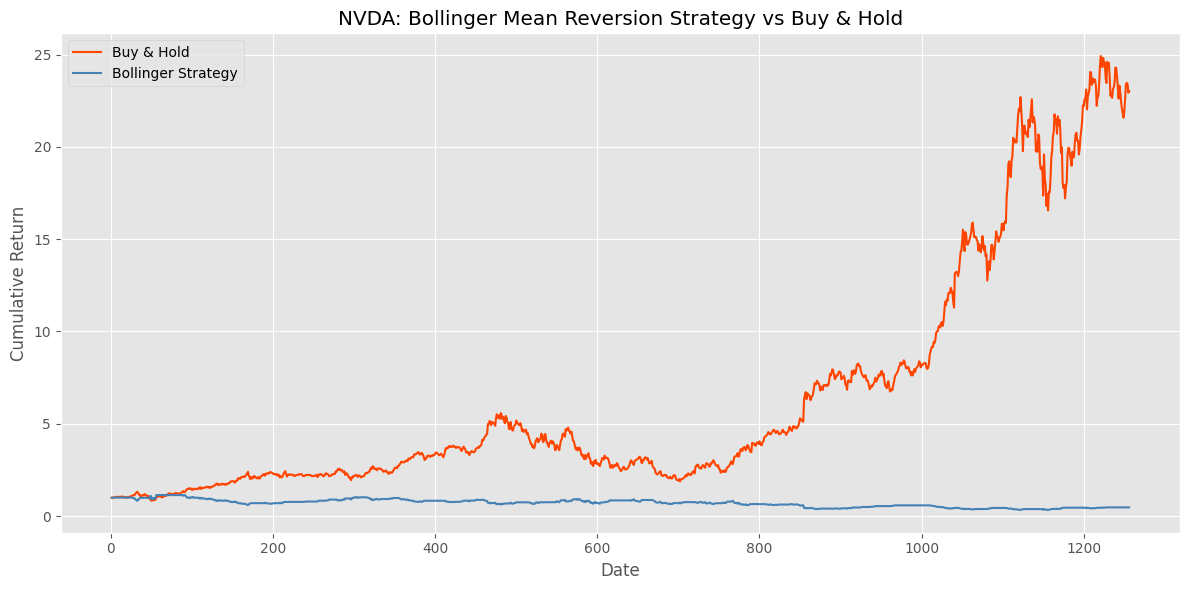

NVDA - Final Strategy Cumulative Return: 0.47
NVDA - Final Buy & Hold Return: 23.02



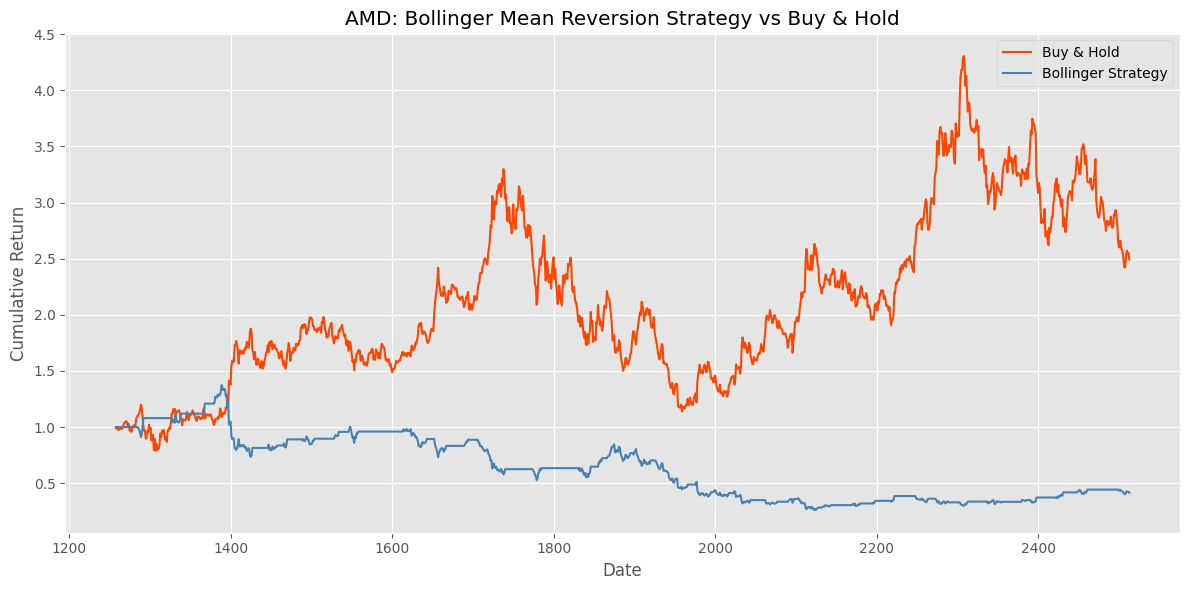

AMD - Final Strategy Cumulative Return: 0.41
AMD - Final Buy & Hold Return: 2.49



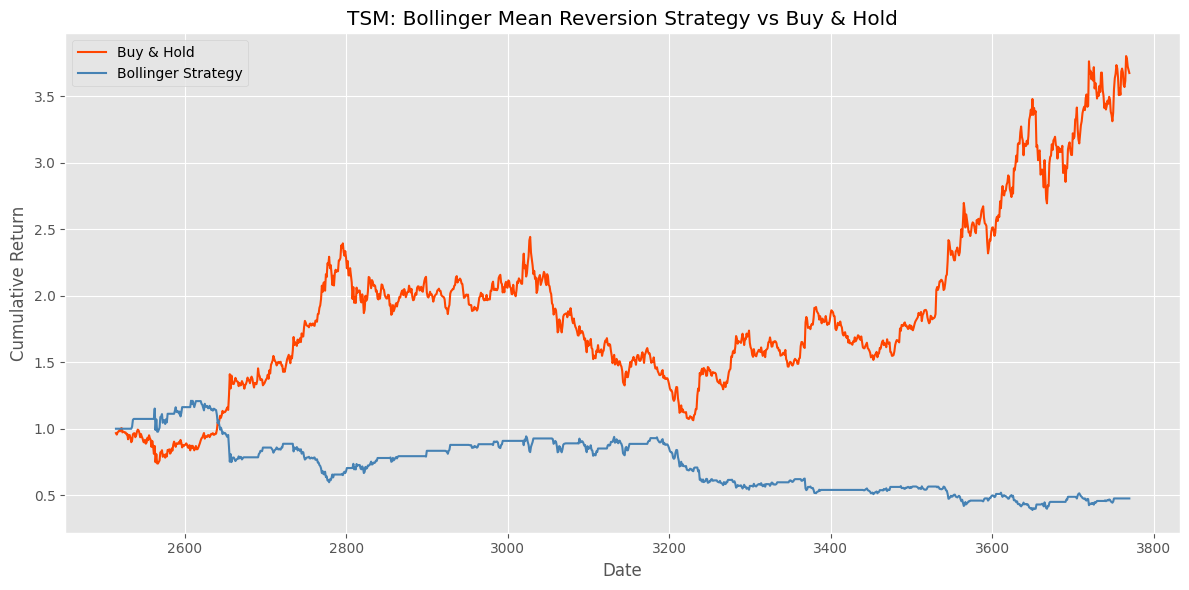

TSM - Final Strategy Cumulative Return: 0.48
TSM - Final Buy & Hold Return: 3.68



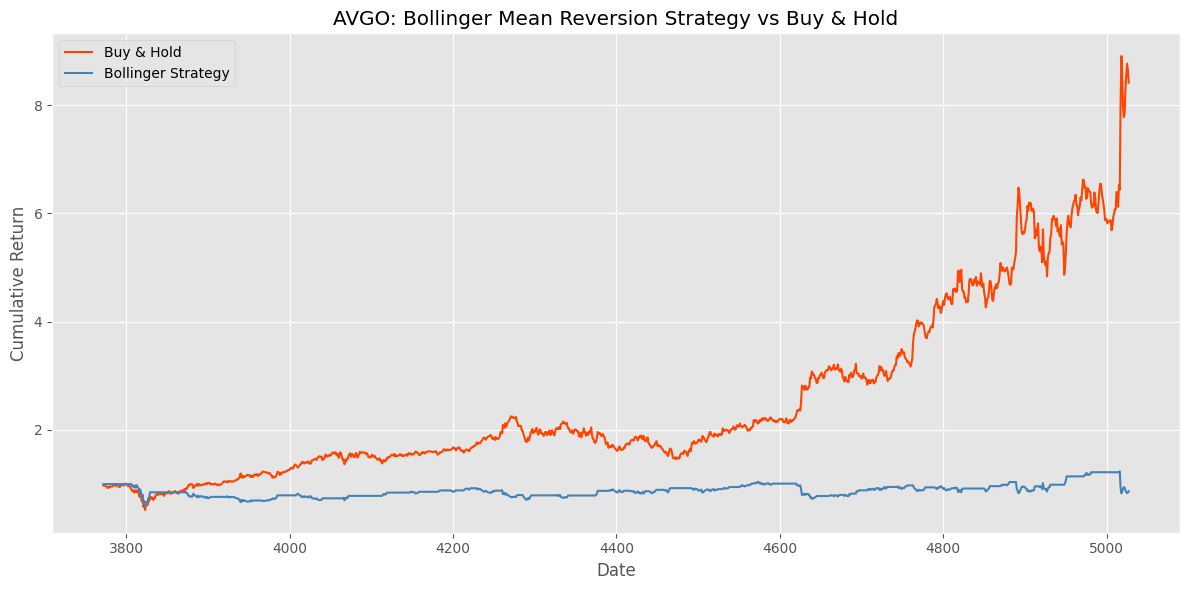

AVGO - Final Strategy Cumulative Return: 0.87
AVGO - Final Buy & Hold Return: 8.42



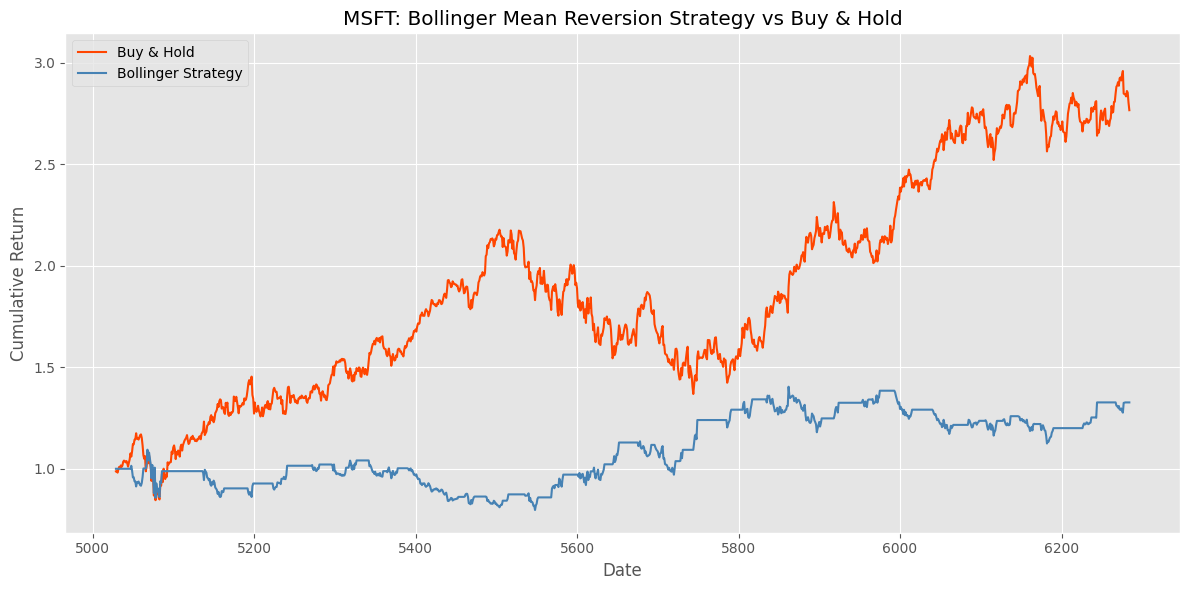

MSFT - Final Strategy Cumulative Return: 1.33
MSFT - Final Buy & Hold Return: 2.77



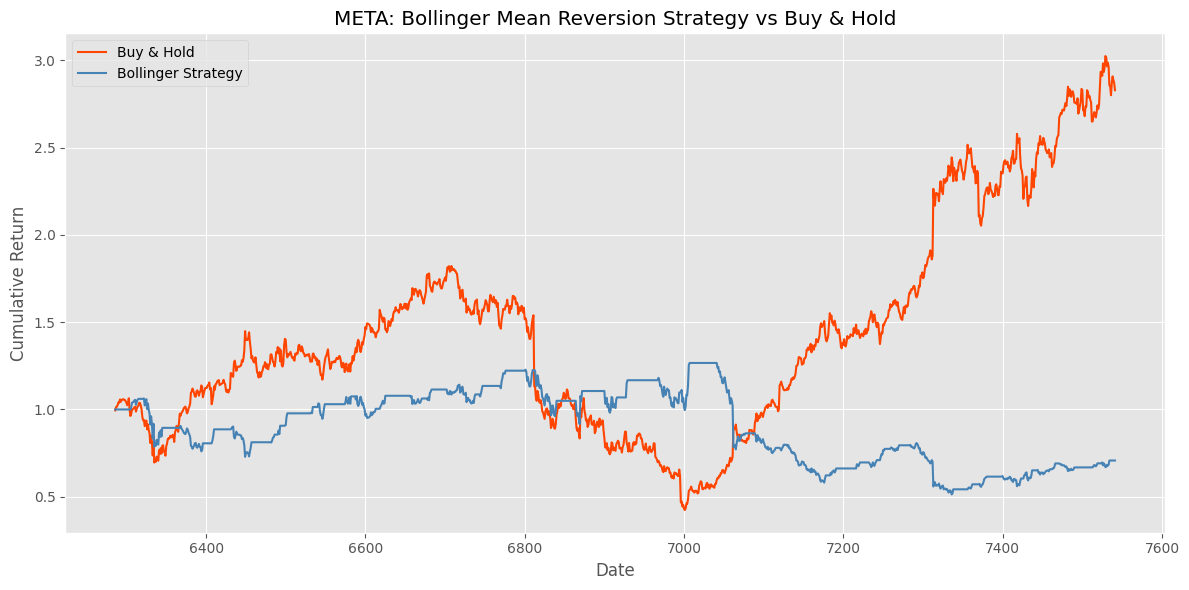

META - Final Strategy Cumulative Return: 0.71
META - Final Buy & Hold Return: 2.83



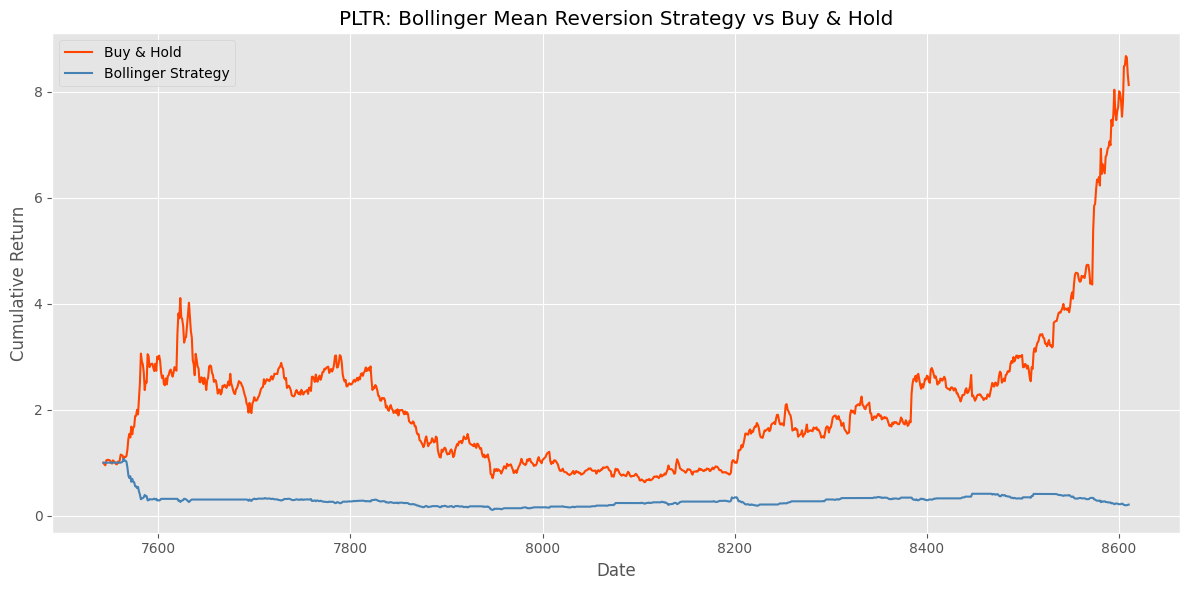

PLTR - Final Strategy Cumulative Return: 0.21
PLTR - Final Buy & Hold Return: 8.12



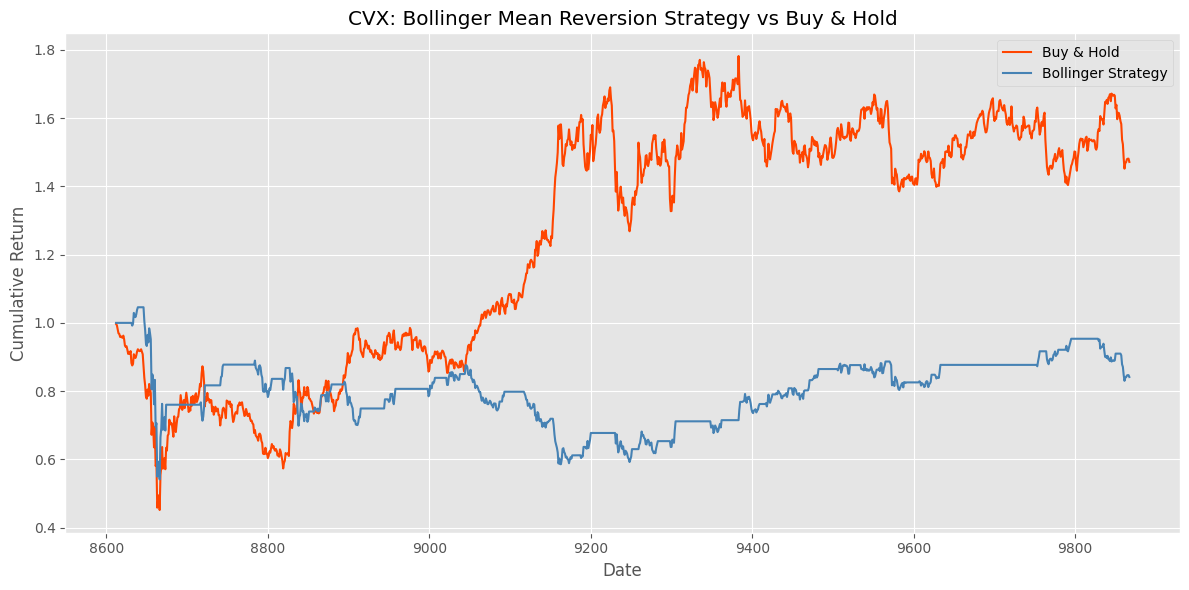

CVX - Final Strategy Cumulative Return: 0.84
CVX - Final Buy & Hold Return: 1.47



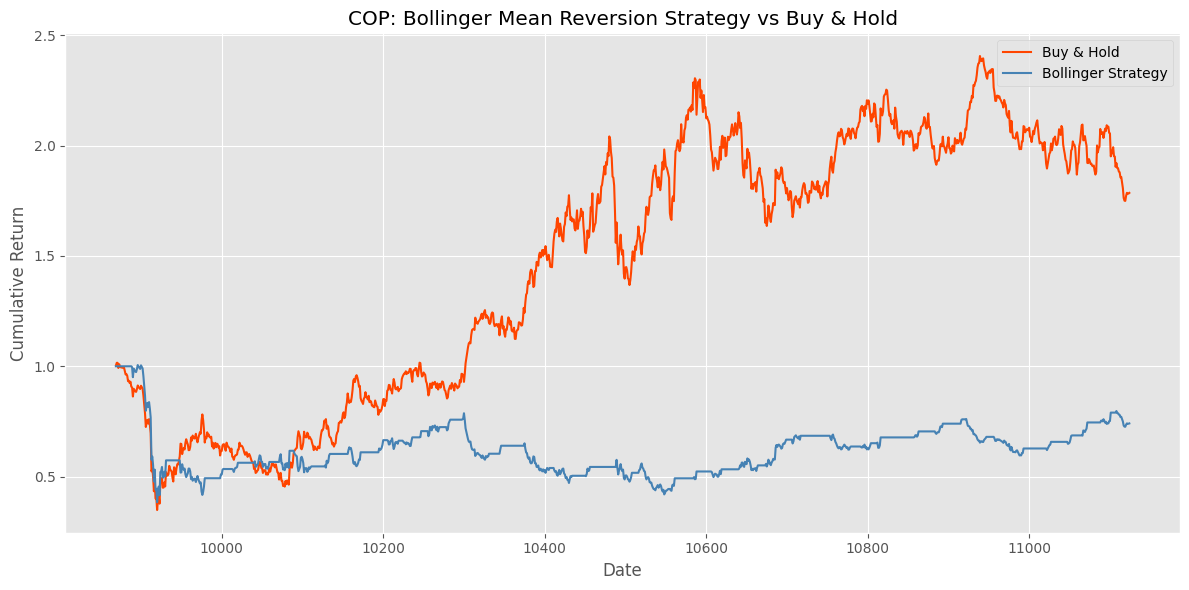

COP - Final Strategy Cumulative Return: 0.74
COP - Final Buy & Hold Return: 1.79



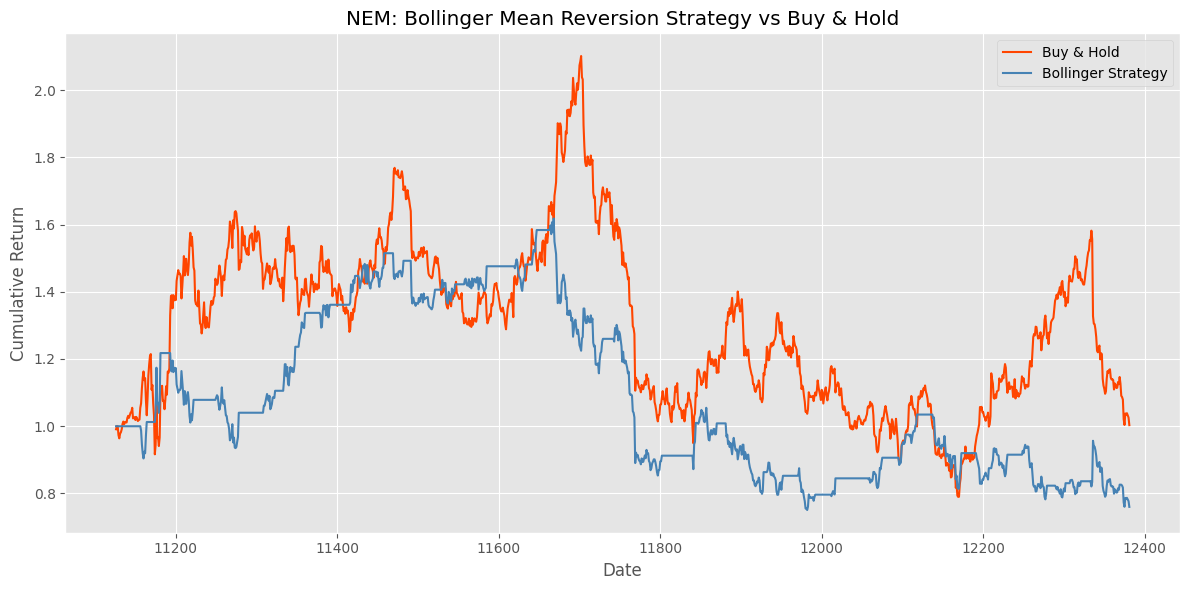

NEM - Final Strategy Cumulative Return: 0.76
NEM - Final Buy & Hold Return: 1.0



In [54]:
# ticker list
tickers = ["NVDA", "AMD", "TSM", "AVGO", "MSFT", "META", "PLTR", "CVX", "COP", "NEM"]

# This assumes your multidata is already loaded
summary_list = []

# Loop through each ticker
for ticker in tickers:
    df = multidata[multidata['Ticker'] == ticker].copy()

    # Calculate Bollinger Bands
    df['SMA20'] = df['Close'].rolling(window=20).mean()
    df['STD'] = df['Close'].rolling(window=20).std()
    df['Upper'] = df['SMA20'] + 2 * df['STD']
    df['Lower'] = df['SMA20'] - 2 * df['STD']

    # Generate signals
    df['Signal'] = 0
    df.loc[df['Close'] < df['Lower'], 'Signal'] = 1
    df.loc[df['Close'] > df['Upper'], 'Signal'] = -1

    # Generate positions
    df['Position'] = 0
    position = 0
    for i in range(1, len(df)):
        if df['Signal'].iloc[i] != 0:
            position = df['Signal'].iloc[i]
        elif (position == 1 and df['Close'].iloc[i] >= df['SMA20'].iloc[i]) or \
             (position == -1 and df['Close'].iloc[i] <= df['SMA20'].iloc[i]):
            position = 0
        df.iloc[i, df.columns.get_loc('Position')] = position

    

    # Shift to avoid look-ahead bias
    df['Position'] = df['Position'].shift(1).fillna(0)

    # Return calculations
    df['Return'] = df['Close'].pct_change()
    df['Strategy'] = df['Position'] * df['Return']
    df['Cumulative Market'] = (1 + df['Return']).cumprod()
    df['Cumulative Strategy'] = (1 + df['Strategy']).cumprod()

    # Final results
    final_strategy = round(df['Cumulative Strategy'].iloc[-1], 2)
    final_market = round(df['Cumulative Market'].iloc[-1], 2)

    summary_list.append({
        "Ticker": ticker,
        "Final Strategy Return": final_strategy,
        "Final Buy & Hold Return": final_market
    })

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Cumulative Market'], label='Buy & Hold', color='orangered')
    plt.plot(df.index, df['Cumulative Strategy'], label='Bollinger Strategy', color='steelblue')
    plt.title(f"{ticker}: Bollinger Mean Reversion Strategy vs Buy & Hold")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Final results
    final_strategy = round(df['Cumulative Strategy'].iloc[-1], 2)
    final_market = round(df['Cumulative Market'].iloc[-1], 2)

    # Print per ticker results
    print(f"{ticker} - Final Strategy Cumulative Return: {final_strategy}")
    print(f"{ticker} - Final Buy & Hold Return: {final_market}\n")

    summary_list.append({
        "Ticker": ticker,
        "Final Strategy Return": final_strategy,
        "Final Buy & Hold Return": final_market
    })

## 4. Portfolio Management
### Correlation Analysis of Daily Returns

This section analyzes the **inter-stock relationships** by calculating the **correlation matrix** of daily returns across the 10 selected stocks.

- We pivot the `multidata` DataFrame to a wide format with **tickers as columns** and **dates as index**.
- Simple **daily percentage returns** are computed for each stock.
- A **heatmap** is then plotted to visualize pairwise correlations between the returns.

The resulting correlation matrix reveals which stocks tend to move together:
- High positive values (e.g., `NVDA` & `AMD`) suggest strong co-movement.
- Low or negative correlations (e.g., `CVX` vs. `META`) may offer diversification opportunities.

This insight is essential for **portfolio construction** and **risk management**.

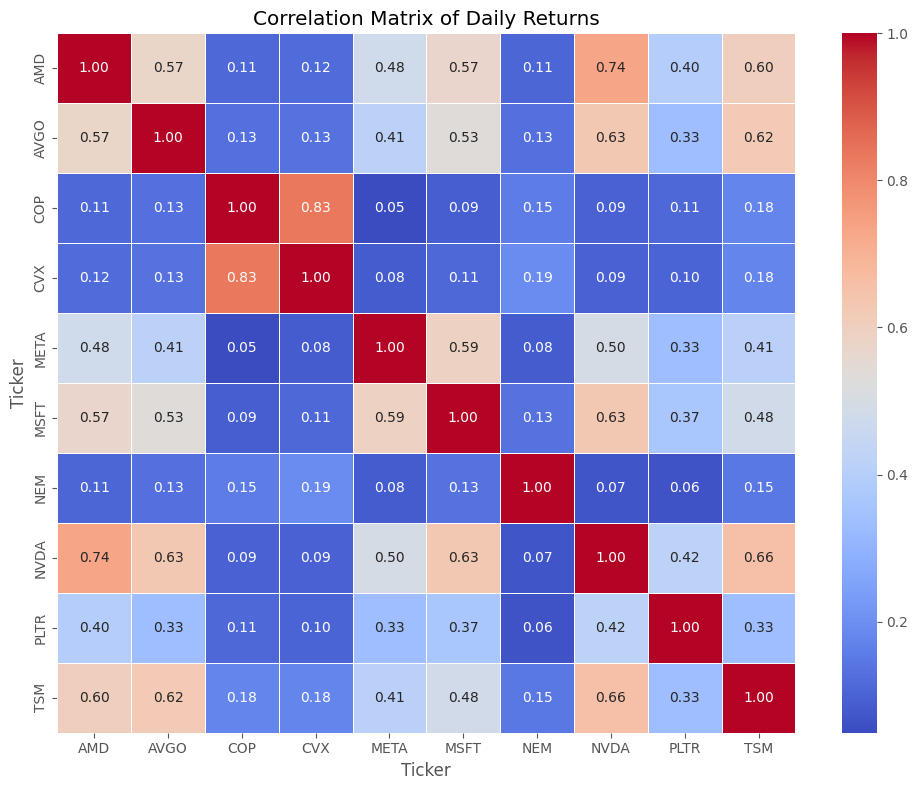

In [55]:
# Pivot to get closing prices in wide format
pivot_close = multidata.pivot(index='Date', columns='Ticker', values='Close')

# Calculate simple daily returns
daily_returns = pivot_close.pct_change().dropna()

# Compute correlation matrix
correlation_matrix = daily_returns.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Daily Returns")
plt.tight_layout()
plt.show()

### Cumulative Return of Equal-Weighted Portfolio (2020–2024)

In this section, we simulate an **equal-weight investment strategy** applied to a portfolio of 10 U.S. tech and growth stocks.

- We assign **equal weights (10%)** to each stock.
- Daily returns are calculated using `pct_change()` and aggregated using matrix multiplication.
- The result is a single time series tracking the **portfolio-level cumulative return** over time.
- The chart below shows how a $1 investment would have grown under this strategy.

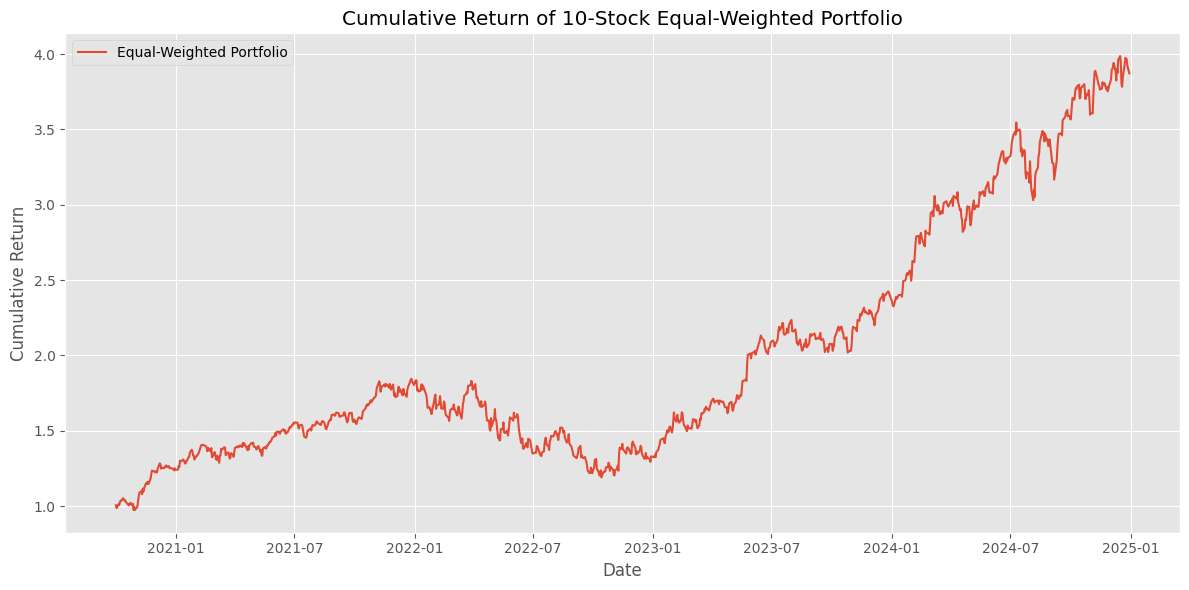

In [56]:
# Load dataset
multidata = pd.read_csv("multidata.csv")
multidata['Date'] = pd.to_datetime(multidata['Date'])

# Define tickers and equal weights
tickers = ["NVDA", "AMD", "TSM", "AVGO", "MSFT", "META", "PLTR", "CVX", "COP", "NEM"]
weights = np.array([1/len(tickers)] * len(tickers))  # Equal weight for all

# Pivot close prices
pivot_close = multidata.pivot(index='Date', columns='Ticker', values='Close')

# Calculate simple daily returns
daily_returns = pivot_close.pct_change().dropna()

# Calculate portfolio daily returns
portfolio_returns = daily_returns.dot(weights)

# Calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()

# Calculate portfolio risk (daily standard deviation)
daily_std = portfolio_returns.std()

# Plot cumulative return
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns, label='Equal-Weighted Portfolio')
plt.title("Cumulative Return of 10-Stock Equal-Weighted Portfolio")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Equal-Weighted Portfolio Return Table & Risk Metric

In this section, we construct a **10-stock equal-weighted portfolio** and evaluate its performance:

- **Equal allocation** is assigned to each of the 10 selected stocks.
- We pivot the dataset to obtain a wide-format closing price matrix.
- Daily **percentage returns** are calculated for each stock.
- The **portfolio’s daily return** is computed via the dot product of returns and weights.
- We then calculate the **cumulative return** over time to understand growth.

Additionally, we generate a **return summary table** containing:
- `Portfolio Daily Return (%)`
- `Cumulative Return (%)`

Finally, we report the **portfolio’s risk**, measured by the **daily standard deviation** of returns.

This table and risk metric help assess the **volatility and growth** of the equally weighted investment strategy.

In [57]:
# Define tickers and equal weights
tickers = ["NVDA", "AMD", "TSM", "AVGO", "MSFT", "META", "PLTR", "CVX", "COP", "NEM"]
weights = np.array([1/len(tickers)] * len(tickers))  # Equal allocation

# Pivot to wide format with closing prices
pivot_close = multidata.pivot(index='Date', columns='Ticker', values='Close')

# Calculate simple daily returns
daily_returns = pivot_close.pct_change().dropna()

# Portfolio daily returns
portfolio_daily_return = daily_returns.dot(weights)

# Cumulative returns
cumulative_return = (1 + portfolio_daily_return).cumprod()

# Create the returns table
returns_table = pd.DataFrame({
    'Portfolio Daily Return (%)': portfolio_daily_return,
    'Cumulative Return (%)': cumulative_return
})
returns_table.index.name = "Date"

# Convert returns to percentage and round
returns_table = (returns_table * 100).round(2)



# Print the first few rows
print(returns_table)

# Calculate risk (daily standard deviation)
daily_std_dev = portfolio_daily_return.std()
print(f"\nDaily Standard Deviation (Risk): {round(daily_std_dev * 100, 2)}%")

            Portfolio Daily Return (%)  Cumulative Return (%)
Date                                                         
2020-10-01                        0.52                 100.52
2020-10-02                       -1.91                  98.60
2020-10-05                        2.61                 101.18
2020-10-06                       -0.53                 100.64
2020-10-07                        1.80                 102.45
...                                ...                    ...
2024-12-23                        2.23                 393.31
2024-12-24                        1.05                 397.44
2024-12-26                       -0.24                 396.49
2024-12-27                       -1.08                 392.20
2024-12-30                       -1.29                 387.16

[1068 rows x 2 columns]

Daily Standard Deviation (Risk): 1.66%


### Daily standard deviation of portfolio returns as a risk measurement
We also compute the **daily portfolio risk** as the standard deviation of returns:

In [58]:
# Calculate risk (daily standard deviation)
daily_std_dev = portfolio_daily_return.std()
print(f"\nDaily Standard Deviation (Risk): {round(daily_std_dev * 100, 4)}%")


Daily Standard Deviation (Risk): 1.6575%


## 5. Portfolio Optimisation
### Sharpe Ratio Optimization for Portfolio Allocation

This section implements a **mean-variance optimization** to maximize the **Sharpe Ratio** of a 10-stock portfolio using historical daily returns.

- **Data Loading & Preparation**:
  - `multidata.csv` is loaded and converted to time-series format.
  - Closing prices are pivoted to wide format, with each column representing a ticker.

- **Daily Return Calculation**:
  - Logarithmic percentage returns are computed and cleaned.

- **Sharpe Ratio Objective**:
  - The function `negative_sharpe(weights)` defines the **objective to minimize** — the *negative* of the annualized Sharpe Ratio.
  - Formula:
    \[
    \text{Sharpe} = \frac{E[R_p] - R_f}{\sigma_p}
    \]
    where \( R_f = 4.246\% \), the U.S. 10-Year Treasury Yield.

- **Optimization Setup**:
  - **Constraints**: Portfolio weights must sum to `1`.
  - **Bounds**: Each weight must lie in the `[0, 1]` interval (no shorting).
  - **Initial Guess**: Equal weighting.

- **Result**:
  - The optimizer (`SLSQP`) provides the **optimal asset weights** that yield the highest Sharpe Ratio.
  - Output is shown in percentage format for interpretability.

This strategy helps construct a **risk-adjusted optimal portfolio** under realistic constraints.

In [61]:
from scipy.optimize import minimize

# Load and prepare data
multidata = pd.read_csv("multidata.csv")
multidata['Date'] = pd.to_datetime(multidata['Date'])

# List of tickers
tickers = ["NVDA", "AMD", "TSM", "AVGO", "MSFT", "META", "PLTR", "CVX", "COP", "NEM"]

# Pivot to get wide format (Date as index, tickers as columns)
df_close = multidata.pivot(index='Date', columns='Ticker', values='Close')
df_close = df_close.dropna()

# Calculate daily returns
returns = df_close.pct_change().dropna()

# Define parameters
TRADING_DAYS = 252
RFR = 0.04246  # risk-free rate (US 10 Year Note Bond Yield)

# Define objective function (negative Sharpe Ratio)
def negative_sharpe(weights):
    p_returns = np.dot(returns, weights)
    annualised_returns = p_returns.mean() * TRADING_DAYS
    annualised_volatility = p_returns.std() * np.sqrt(TRADING_DAYS)
    sharpe = (annualised_returns - RFR) / annualised_volatility
    return -sharpe

# Constraints: weights must sum to 1
cons = {"type": "eq", "fun": lambda x: np.sum(x) - 1}

# Bounds: weights between 0 and 1
bounds = tuple((0, 1) for _ in range(len(tickers)))

# Initial guess: equal weights
init_weights = np.ones(len(tickers)) / len(tickers)

# Optimization
optimal = minimize(negative_sharpe, init_weights, method='SLSQP', bounds=bounds, constraints=cons)

# Extract optimal weights
opt_weights = optimal.x
opt_weights_df = pd.DataFrame({'Ticker': tickers, 'Optimal Weight (%)': np.round(opt_weights * 100, 2)})

# Display in console/terminal
print("Optimal Portfolio Weights (%):")
print(opt_weights_df.to_string(index=False))

Optimal Portfolio Weights (%):
Ticker  Optimal Weight (%)
  NVDA                0.00
   AMD               34.35
   TSM               35.92
  AVGO                0.00
  MSFT                0.00
  META                0.00
  PLTR                0.00
   CVX               18.39
   COP               11.34
   NEM                0.00


### Efficient Frontier Simulation with 5000 Random Portfolios

This visualization illustrates the **risk-return trade-off** of 5000 randomly generated portfolios composed of 10 selected stocks.

#### Key Features:
- **Simulated Portfolios**: Each portfolio is randomly weighted, fully invested (weights sum to 1), and long-only (weights ≥ 0).
- **Metrics Computed**:
  - **Expected Return** (annualized)
  - **Volatility** (annualized standard deviation)
  - **Sharpe Ratio** (with a risk-free rate of 4.803%)
- **Color Gradient**: Points are colored by Sharpe Ratio, with lighter shades representing higher efficiency.
- **Optimal Portfolio**: The portfolio with the maximum Sharpe Ratio is highlighted with a red star.

This analysis helps visualize the **efficient frontier** and identify the portfolio offering the best risk-adjusted return.

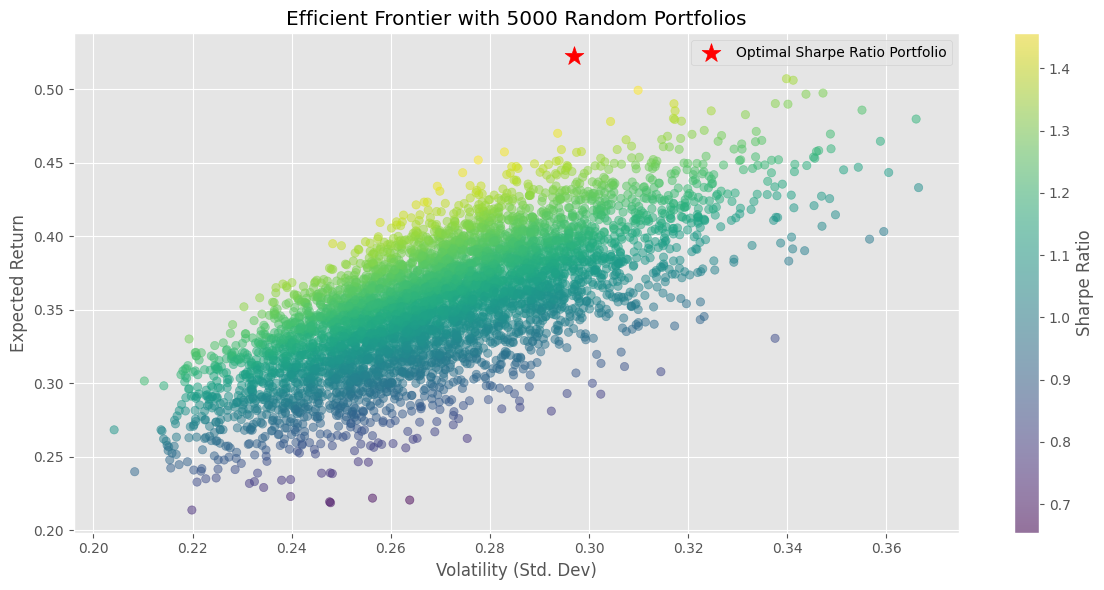

In [ ]:
# Simulate 5000 random portfolios
num_portfolios = 5000
results = np.zeros((3, num_portfolios))
weights_record = []
risk_free_rate = 0.04803

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weights_record.append(weights)

    port_return = np.sum(daily_returns.mean() * weights) * 252
    port_std = np.sqrt(np.dot(weights.T, np.dot(daily_returns.cov() * 252, weights)))
    sharpe = (port_return - risk_free_rate) / port_std

    results[0, i] = port_std
    results[1, i] = port_return
    results[2, i] = sharpe

# Plot Efficient Frontier
plt.figure(figsize=(12, 6))
plt.scatter(results[0, :], results[1, :], c=results[2, :], cmap='viridis', alpha=0.5)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Std. Dev)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with 5000 Random Portfolios')

# Plot Optimal Portfolio
opt_return = np.dot(daily_returns.mean(), opt_weights) * 252
opt_vol = np.sqrt(np.dot(opt_weights.T, np.dot(daily_returns.cov() * 252, opt_weights)))
plt.scatter(opt_vol, opt_return, marker='*', color='r', s=200, label='Optimal Sharpe Ratio Portfolio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Minimum Volatility Portfolio Optimization from Generative AI

This section performs **portfolio optimization** to construct a portfolio with **minimum volatility** using historical daily returns.

- **Step 1: Data Preparation**
  - `daily_returns` is a DataFrame containing daily percentage returns of 10 assets.
  - The **covariance matrix** is calculated to quantify inter-asset risk relationships.

- **Step 2: Objective Function**
  - The optimization goal is to **minimize portfolio volatility**, defined as the annualized standard deviation of returns:
    \[
    \sigma_p = \sqrt{w^T \Sigma w} \times \sqrt{252}
    \]
    where \( w \) is the weight vector, and \( \Sigma \) is the covariance matrix.

- **Step 3–4: Constraints & Bounds**
  - The portfolio must be **fully invested**: weights sum to 1.
  - **No short selling** is allowed: weights constrained between 0 and 1.

- **Step 5: Initialization**
  - The optimizer starts with an **equally weighted portfolio** as the baseline.

- **Step 6: Optimization via SLSQP**
  - The **Sequential Least Squares Programming (SLSQP)** method is used to efficiently solve the constrained minimization problem.

- **Step 7: Output**
  - Final results show each ticker’s **optimal allocation (%)** in the minimum risk portfolio.

This approach is often used in conservative strategies prioritizing **risk minimization over return maximization**.

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Step 1: Prepare return data
# Assuming 'daily_returns' is a (n_days x n_assets) DataFrame
# Each column represents a stock's simple daily return
returns = daily_returns.to_numpy()
cov_matrix = np.cov(returns.T)  # Covariance matrix of asset returns
n_assets = returns.shape[1]

# Step 2: Define objective function: portfolio volatility
def portfolio_volatility(weights):
    """
    Objective function: calculate annualized portfolio volatility
    :param weights: array of portfolio weights
    :return: annualized volatility (risk) of the portfolio
    """
    weights = np.array(weights)
    port_var = np.dot(weights.T, np.dot(cov_matrix, weights)) 
    return np.sqrt(port_var) * np.sqrt(252)  # Annualized volatility

# Step 3: Define constraints
# Weights must sum to 1 (fully invested portfolio)
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

# Step 4: Define bounds
# Each weight must be between 0 and 1 (no short selling)
bounds = tuple((0, 1) for _ in range(n_assets))

# Step 5: Initial weights (equally weighted portfolio)
init_weights = np.ones(n_assets) / n_assets

# Step 6: Run optimizer using SciPy minimize
optimal = minimize(portfolio_volatility, init_weights, method='SLSQP',
                   bounds=bounds, constraints=constraints)

# Step 7: Format and print results
opt_weights = optimal.x
opt_weights_df = pd.DataFrame({
    'Ticker': daily_returns.columns,
    'Optimal Weight (%)': np.round(opt_weights * 100, 2)
})

# Output result in table format
print("Minimum Volatility Portfolio Allocation:")
print(opt_weights_df.to_string(index=False))

Minimum Volatility Portfolio Allocation:
Ticker  Optimal Weight (%)
   AMD                0.00
  AVGO                0.45
   COP                0.00
   CVX               36.84
  META                0.00
  MSFT               38.92
   NEM               19.17
  NVDA                0.00
  PLTR                0.00
   TSM                4.61


### Portfolio Optimization Strategies: Sharpe Ratio vs. Minimum Volatility vs. Equal-Weight

This section compares three portfolio strategies based on historical daily returns:
- **AI-generated Minimum Volatility Portfolio**: Minimizes overall risk through covariance structure.
- **Sharpe Ratio Optimised Portfolio**: Maximizes risk-adjusted return (Sharpe Ratio).
- **Equal-weight Portfolio**: Baseline strategy allocating equal capital to each asset.

#### Steps Implemented:
- Constructed the **covariance matrix** of daily returns.
- Applied `SciPy.optimize.minimize` to solve:
  - Minimum portfolio volatility
  - Maximum Sharpe ratio (negative Sharpe minimized)
- Generated **portfolio returns** and cumulative returns for each strategy.
- Plotted cumulative performance for visual comparison.

> All portfolios are fully invested (sum of weights = 1) and constrained to no short selling (`weights ∈ [0,1]`).

The resulting plot visually illustrates which strategy outperformed during the analysis period based on cumulative returns.

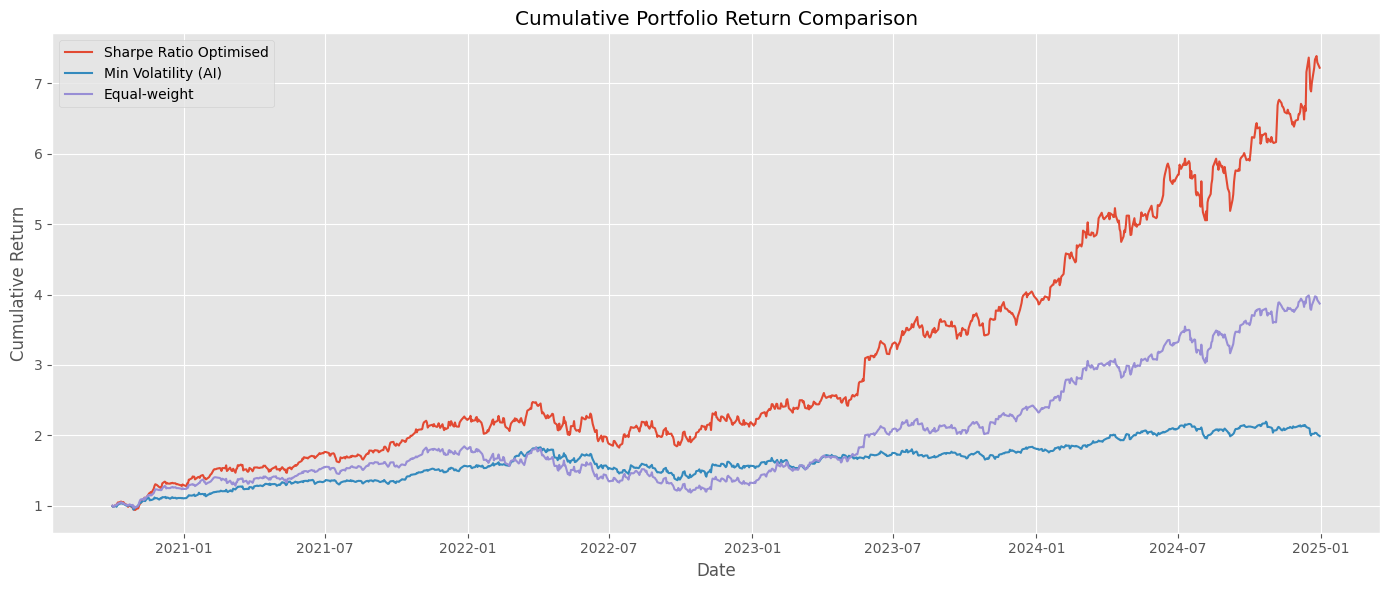

In [ ]:
# AI-generated Strategy: Minimum Volatility Portfolio
cov_matrix = np.cov(daily_returns.T)

def portfolio_volatility(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(TRADING_DAYS)

optimal_vol = minimize(portfolio_volatility, init_weights, method="SLSQP", bounds=bounds, constraints=constraints)
weights_vol = optimal_vol.x
vol_port_return = daily_returns.dot(weights_vol)
vol_cum_return = (1 + vol_port_return).cumprod()

# Equal-weight Portfolio
equal_port_return = daily_returns.dot(init_weights)
equal_cum_return = (1 + equal_port_return).cumprod()

#  Sharpe Ratio Optimisation
mean_returns = daily_returns.mean()
cov_matrix = np.cov(daily_returns.T)

def neg_sharpe(weights):
    port_return = np.dot(mean_returns, weights) * TRADING_DAYS
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(TRADING_DAYS)
    return -port_return / port_vol

constraints = {"type": "eq", "fun": lambda x: np.sum(x) - 1}
bounds = tuple((0, 1) for _ in range(len(daily_returns.columns)))
init_weights = np.ones(len(daily_returns.columns)) / len(daily_returns.columns)

optimal = minimize(neg_sharpe, init_weights, method="SLSQP", bounds=bounds, constraints=constraints)
opt_weights = optimal.x

sharpe_port_return = daily_returns.dot(opt_weights)
sharpe_cum_return = (1 + sharpe_port_return).cumprod()

# Plot Comparison
plt.figure(figsize=(14, 6))
plt.plot(sharpe_cum_return.index, sharpe_cum_return, label="Sharpe Ratio Optimised")
plt.plot(vol_cum_return.index, vol_cum_return, label="Min Volatility (AI)")
plt.plot(equal_cum_return.index, equal_cum_return, label="Equal-weight")
plt.title("Cumulative Portfolio Return Comparison")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()